In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/333-dataset/all_call_stages.csv', low_memory=False)
df.head()

id  gender physically_challenged    division  district city  \
0   1     NaN                    No         NaN       NaN  NaN   
1   2    Male                   Yes  Mymensingh   Sherpur  NaN   
2   3    Male                    No  Chittagong   Comilla  NaN   
3   4  Female                    No       Dhaka  Faridpur  NaN   
4   5  Female                    No       Dhaka  Faridpur  NaN   

          upazila        municipality ward mauza village location comments  \
0             NaN                 NaN  NaN   NaN     NaN      NaN      NaN   
1   Sherpur Sadar  Sherpur Pourasabha  NaN   NaN     NaN      NaN      NaN   
2           Titas                 NaN  NaN   NaN     NaN      NaN      NaN   
3  Faridpur Sadar                 NaN  NaN   NaN     NaN      NaN      NaN   
4  Faridpur Sadar                 NaN  NaN   NaN     NaN      NaN      NaN   

                                pcqc                scqc  \
0  No Response and Disconnected Call  Mute Or Blank Call   
1  No Response and Disconnected Call  Mute Or Blank Call   
2  No Response and Disconnected Call  Mute Or Blank Call   
3  No Response and Disconnected Call  Mute Or Blank Call   
4  No Response and Disconnected Call  Mute Or Blank Call   

                           call_type          answered_at  call_duration_min  \
0  No Response and Disconnected Call  2023-12-31 23:56:50               0.18   
1  No Response and Disconnected Call  2023-12-31 23:51:17               0.58   
2  No Response and Disconnected Call  2023-12-31 23:53:19               0.10   
3  No Response and Disconnected Call  2023-12-31 23:55:51               0.35   
4  No Response and Disconnected Call  2023-12-31 23:57:36               0.30   

   event_date  
0  2024-01-01  
1  2024-01-01  
2  2024-01-01  
3  2024-01-01  
4  2024-01-01

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833671 entries, 0 to 1833670
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   gender                 object 
 2   physically_challenged  object 
 3   division               object 
 4   district               object 
 5   city                   object 
 6   upazila                object 
 7   municipality           object 
 8   ward                   object 
 9   mauza                  object 
 10  village                object 
 11  location               object 
 12  comments               object 
 13  pcqc                   object 
 14  scqc                   object 
 15  call_type              object 
 16  answered_at            object 
 17  call_duration_min      float64
 18  event_date             object 
dtypes: float64(1), int64(1), object(17)
memory usage: 265.8+ MB


In [38]:
df = df.drop(['id','municipality','ward','mauza','village','location','city','comments', 'answered_at'], axis=1) # Removing Unnessary collums

In [39]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df,explorative = True, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
df.dropna(subset=['physically_challenged', 'pcqc', 'scqc', 'call_type'], inplace=True) # Dropping the rows of missing values.

df['gender'] = df['gender'].fillna('Unknown') # Imputing the feature

In [41]:
# division, district and upazila have around 50% missing values. 

df[['division', 'district', 'upazila']] = df[['division', 'district', 'upazila']].fillna('Unknown')

In [42]:
# Convetert this text data into catagories 

df['district'] = df['district'].astype('category')
df['upazila'] = df['upazila'].astype('category')
df['pcqc'] = df['pcqc'].astype('category')
df['scqc'] = df['scqc'].astype('category')

In [43]:
df = df.sort_values(by='event_date')

In [44]:
df = df.dropna()

In [45]:
df.shape

(1832358, 10)

In [46]:
# Count the number of occurrences for three conditions
query_not_related_count = df[df['pcqc'].isin(["Query Not Related To 333 Service", "No Response and Disconnected Call", "Prank Call"])].shape[0]
print("Count of 'Query Not Related To 333 Service', 'No Response and Disconnected Call' and 'Prank Call':", query_not_related_count)

# Percentage of "Query Not Related To 333 Service"
total_queries = df.shape[0]
percentage_not_related = (query_not_related_count / total_queries) * 100
print(f"Percentage of 'Query Not Related To 333 Service': {percentage_not_related:.2f}%")

Count of 'Query Not Related To 333 Service', 'No Response and Disconnected Call' and 'Prank Call': 1258871
Percentage of 'Query Not Related To 333 Service': 68.70%


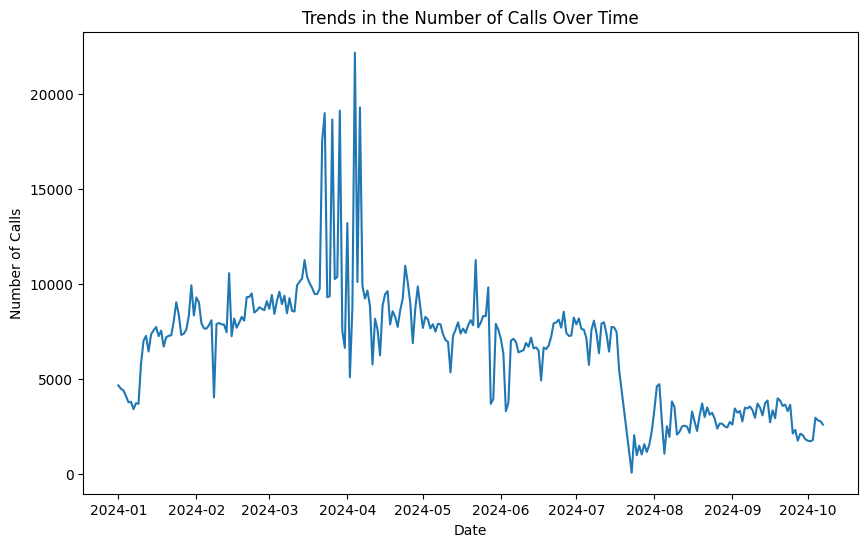

In [47]:
#Number Of Calls over time

df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce') 
calls_over_time = df.groupby(df['event_date'].dt.date).size()

calls_over_time.plot(kind='line', figsize=(10, 6))
plt.title("Trends in the Number of Calls Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.show()

In [48]:
# Define thresholds
too_short_threshold = 0.2  # Calls shorter than 0.2 minutes
too_long_threshold = 15   # Calls longer than 15 minutes

# Mark anomalies
df['is_anomaly'] = ((df['call_duration_min'] < too_short_threshold) | 
                    (df['call_duration_min'] > too_long_threshold)).astype(int)

In [49]:
# Count anomalies
anomaly_count = df['is_anomaly'].sum()
print("Number of anomalies:", anomaly_count)

# Percentage of anomalies
anomaly_percentage = (anomaly_count / len(df)) * 100
print("Percentage of anomalies:", anomaly_percentage, "%")

# Summary statistics of anomalies
print(df[df['is_anomaly'] == 1]['call_duration_min'].describe())

Number of anomalies: 473469
Percentage of anomalies: 25.839328340859158 %
count    473469.000000
mean          0.150298
std          18.935337
min           0.000000
25%           0.000000
50%           0.020000
75%           0.120000
max       12967.980000
Name: call_duration_min, dtype: float64


In [50]:
# Convert event_date to datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# Aggregate anomalies by day
daily_anomalies = df.groupby(df['event_date'].dt.date)['is_anomaly'].sum().reset_index()
daily_anomalies.columns = ['date', 'anomaly_count']
daily_anomalies['date'] = pd.to_datetime(daily_anomalies['date'])

# Set date as the index
daily_anomalies.set_index('date', inplace=True)

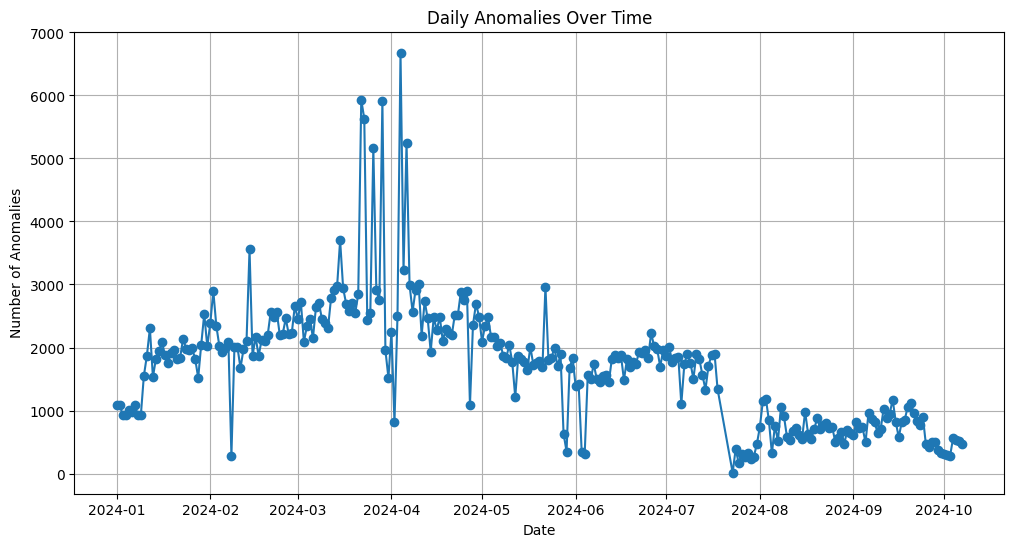

In [51]:
# Plot daily anomalies
plt.figure(figsize=(12, 6))
plt.plot(daily_anomalies.index, daily_anomalies['anomaly_count'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Anomalies')
plt.title('Daily Anomalies Over Time')
plt.grid()
plt.show()

In [52]:
# Date-Time Features Extraction

df['event_date'] = pd.to_datetime(df['event_date'])
df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month
df['day'] = df['event_date'].dt.day
df['day_of_week'] = df['event_date'].dt.dayofweek  # Monday=0, Sunday=6

# Drop 'event_date' and 'call_duration_min' to avoid leakage
df = df.drop(columns=['event_date', 'call_duration_min'])

In [53]:
# Drop the original high-cardinality columns
df = df.drop(columns=['district', 'upazila'])

In [54]:
profile = ProfileReport(df,explorative = True, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
# Define the split point (e.g., 80% training, 20% testing)
split_point = int(0.8 * len(df))

# Split the data into training and testing sets
X_train = df.iloc[:split_point].drop(columns=['is_anomaly'])
y_train = df.iloc[:split_point]['is_anomaly']

X_test = df.iloc[split_point:].drop(columns=['is_anomaly'])
y_test = df.iloc[split_point:]['is_anomaly']

In [56]:
# Apply frequency encoding to high-cardinality columns
def frequency_encoding(column):
    return column.map(column.value_counts(normalize=True))

high_cardinality_cols = ['pcqc', 'scqc']
for col in high_cardinality_cols:
    X_train[col] = frequency_encoding(X_train[col])
    X_test[col] = frequency_encoding(X_test[col])

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Feature transformation
numeric_features = ['year', 'month', 'day', 'day_of_week']
categorical_features = ['gender', 'physically_challenged', 'division', 'pcqc', 'scqc', 'call_type']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [58]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [59]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=50, batch_size=1000)
X_train = ipca.fit_transform(X_train_preprocessed)
X_test = ipca.transform(X_test_preprocessed)

In [60]:
# Check explained variance ratio
explained_variance = ipca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
print("Total explained variance:", sum(explained_variance))

Explained variance ratio: [0.1828137  0.1719728  0.15442797 0.14121191 0.0637932  0.03493505
 0.02812717 0.02464442 0.02147167 0.01805415 0.01491515 0.01256659
 0.01190398 0.01035267 0.00932978 0.00834058 0.00813964 0.00809193
 0.00763683 0.0060956  0.00533592 0.00524641 0.00510096 0.00370393
 0.0034879  0.00305456 0.00259668 0.00207773 0.0019524  0.00157158
 0.00145397 0.00140951 0.00118975 0.00114828 0.00105081 0.00087324
 0.00083909 0.00076469 0.00066937 0.00064357 0.00060718 0.00057851
 0.00052012 0.00049757 0.00046692 0.0004284  0.00041407 0.00034169
 0.00032638 0.00029825]
Total explained variance: 0.9874742150956776


In [61]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.2, random_state=42)
model.fit(X_train)

# Predict anomalies
y_pred = model.predict(X_test)
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

# Evaluate the model
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80    279213
           1       0.24      0.16      0.19     87259

    accuracy                           0.68    366472
   macro avg       0.50      0.50      0.49    366472
weighted avg       0.64      0.68      0.65    366472



In [62]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

class_weights = {0: 1, 1: 6}  # Assign higher weight to anomalies (class 1)
# Train LightGBM
model = LGBMClassifier(objective='binary', class_weight=class_weights, random_state=42)
model.fit(X_train, y_train)

# Predict anomalies
y_pred_binary = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_binary))

[LightGBM] [Info] Number of positive: 386210, number of negative: 1079676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 1465886, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.682162 -> initscore=0.763724
[LightGBM] [Info] Start training from score 0.763724
              precision    recall  f1-score   support

           0       0.80      0.93      0.86    279213
           1       0.52      0.24      0.32     87259

    accuracy                           0.77    366472
   macro avg       0.66      0.58      0.59    366472
weighted avg       0.73      0.77      0.73    366472

